In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as ds

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data() # CIFAR-10: 자연영상 데이터셋
x_train = x_train.astype(np.float32)/255.0 # [0,1]로 정규화
x_test = x_test.astype(np.float32)/255.0 # [0,1]로 정규화
y_train = tf.keras.utils.to_categorical(y_train, 10) # 원핫 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test, 10) # 원핫 코드로 변환

In [3]:
# 모델 선택(신경망 구조 설계)
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), activation="relu", input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0,25)) # 규제 기법인 드롭아웃 적용
cnn.add(Conv2D(64,(3,3), activation="relu"))
cnn.add(Conv2D(64,(3,3), activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0,25))
cnn.add(Flatten())
cnn.add(Dense(units=512, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(units=10, activation="softmax"))

c:\Users\GreenTea\anaconda3\envs\Test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# 학습
cnn.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), verbose=2)

Epoch 1/100
391/391 - 55s - 140ms/step - accuracy: 0.4168 - loss: 1.5788 - val_accuracy: 0.5036 - val_loss: 1.3375
Epoch 2/100
391/391 - 47s - 121ms/step - accuracy: 0.5629 - loss: 1.2172 - val_accuracy: 0.6221 - val_loss: 1.0635
Epoch 3/100
391/391 - 48s - 122ms/step - accuracy: 0.6410 - loss: 1.0225 - val_accuracy: 0.6783 - val_loss: 0.9247
Epoch 4/100
391/391 - 48s - 122ms/step - accuracy: 0.6873 - loss: 0.8907 - val_accuracy: 0.7030 - val_loss: 0.8448
Epoch 5/100
391/391 - 48s - 122ms/step - accuracy: 0.7207 - loss: 0.7966 - val_accuracy: 0.7100 - val_loss: 0.8331
Epoch 6/100
391/391 - 48s - 123ms/step - accuracy: 0.7458 - loss: 0.7265 - val_accuracy: 0.7400 - val_loss: 0.7483
Epoch 7/100
391/391 - 49s - 124ms/step - accuracy: 0.7672 - loss: 0.6672 - val_accuracy: 0.7530 - val_loss: 0.7188
Epoch 8/100
391/391 - 48s - 122ms/step - accuracy: 0.7871 - loss: 0.6017 - val_accuracy: 0.7466 - val_loss: 0.7300
Epoch 9/100
391/391 - 48s - 123ms/step - accuracy: 0.8002 - loss: 0.5691 - val_a

In [5]:
# 예측(성능 측정)
res = cnn.evaluate(x_test, y_test, verbose=0)
print("정확률=", res[1]*100)

정확률= 77.13000178337097


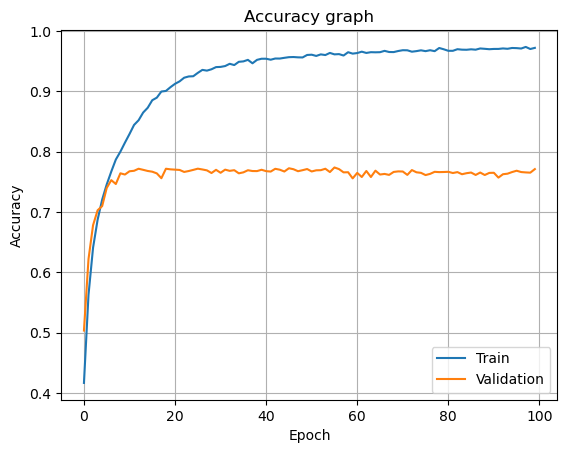

In [6]:
# 정확도 그래프 그리기
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy graph")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()

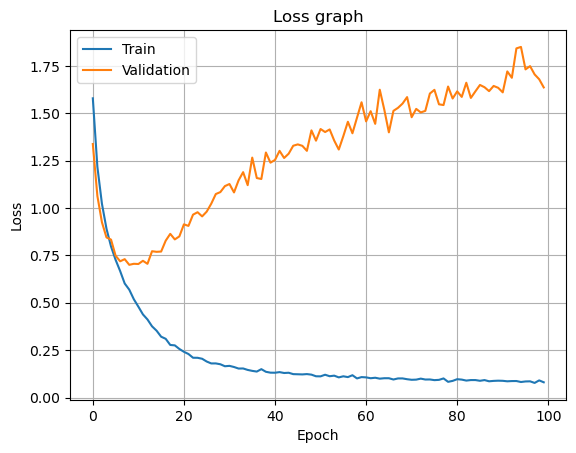

In [7]:
# 손실 그래프 그리기
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.grid()
plt.show()